## Primera parte del ejercicio

In [83]:
import pandas as pd
import geopandas as gpd

In [84]:
# Carga de datos 
cantones = gpd.read_file("datos/geopandas/recursos/geojson/cantones.geojson")

<AxesSubplot:>

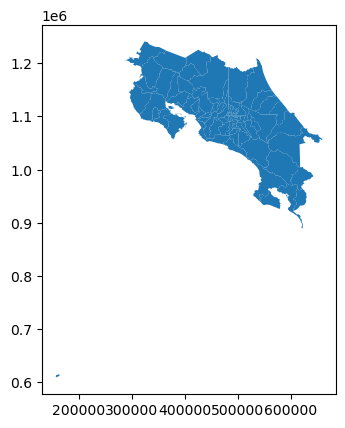

In [85]:
cantones.plot()

In [86]:
positivos_final = pd.read_csv("datos/graficacion/05_30_22_CSV_POSITIVOS.csv", 
                                       sep=";", 
                                       encoding="iso-8859-1")

positivos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Columns: 811 entries, cod_provin to 30/05/2022
dtypes: float64(809), object(2)
memory usage: 532.3+ KB


In [87]:
positivos_final = positivos_final[["cod_provin", "cod_canton", "provincia", "canton", "30/05/2022"]]

# Eliminación de fila con valores nulos
positivos_final = positivos_final.dropna(how='all')

# Eliminación de fila con canton=="Otros"
positivos_final = positivos_final[positivos_final["canton"] != "Otros"]

# Cambio de nombre de columnas
positivos_final = positivos_final.rename(columns={"30/05/2022": "positivos"})

In [88]:
positivos_final

,cod_provin,cod_canton,provincia,canton,positivos
0,1.0,112.0,San José,Acosta,4104.0
1,1.0,110.0,San José,Alajuelita,18973.0
2,1.0,106.0,San José,Aserrí,10880.0
3,1.0,118.0,San José,Curridabat,14518.0
4,1.0,103.0,San José,Desamparados,43283.0
...,...,...,...,...,...
77,7.0,701.0,Limón,Limón,16822.0
78,7.0,705.0,Limón,Matina,5822.0
79,7.0,702.0,Limón,Pococí,20449.0
80,7.0,703.0,Limón,Siquirres,10349.0


In [89]:
positivos_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cod_provin  82 non-null     float64
 1   cod_canton  82 non-null     float64
 2   provincia   82 non-null     object 
 3   canton      82 non-null     object 
 4   positivos   82 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.8+ KB


In [90]:
positivos_merged = cantones.merge(positivos_final, on="cod_canton")
positivos_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gmlid         82 non-null     object  
 1   cod_catalo    82 non-null     object  
 2   cod_canton    82 non-null     float64 
 3   canton_x      82 non-null     object  
 4   ori_toponi    82 non-null     object  
 5   area          82 non-null     float64 
 6   cod_provin_x  82 non-null     float64 
 7   provincia_x   82 non-null     object  
 8   version       82 non-null     object  
 9   geometry      82 non-null     geometry
 10  cod_provin_y  82 non-null     float64 
 11  provincia_y   82 non-null     object  
 12  canton_y      82 non-null     object  
 13  positivos     82 non-null     float64 
dtypes: float64(5), geometry(1), object(8)
memory usage: 9.6+ KB


## Segunda parte del ejercicio

In [91]:
# Carga de datos 
provincias = gpd.read_file("datos/geopandas/recursos/geojson/provincias.geojson")
provincias

,cod_catalo,cod_provin,provincia,ori_toponi,area,version,geometry
0,160103,6,Puntarenas,"En documento de 1720, se menciona la llegada d...",11298.51,20201222,"MULTIPOLYGON (((159917.678 609423.101, 159908...."
1,160103,1,San José,Se remonta a la creación de la ermita dedicada...,4969.73,20201222,"MULTIPOLYGON (((505765.299 1122058.641, 505764..."
2,160103,7,Limón,El origen del nombre de la provincia se remont...,9176.96,20201222,"MULTIPOLYGON (((532516.580 1209982.790, 532547..."
3,160103,3,Cartago,Don Juan Vázques de Coronado escogió el sitio ...,3093.23,20201222,"MULTIPOLYGON (((556146.097 1048733.919, 556133..."
4,160103,2,Alajuela,Se remonta al paraje llamado La Lajuela que po...,9772.27,20201222,"MULTIPOLYGON (((427195.040 1224439.870, 433781..."
5,160103,5,Guanacaste,En alegoria a un frondoso árbol de Guanacaste ...,10196.32,20201222,"MULTIPOLYGON (((380807.344 1124281.485, 380805..."
6,160103,4,Heredia,En correspondiencia al Presidente de la Real ...,2663.46,20201222,"MULTIPOLYGON (((497345.134 1193382.987, 497345..."


In [92]:
positivos_final = positivos_final.groupby(["cod_provin"])["positivos"].sum()
prov_positivos_merged = provincias.merge(positivos_final, on="cod_provin")

prov_positivos_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cod_catalo  7 non-null      object  
 1   cod_provin  7 non-null      int64   
 2   provincia   7 non-null      object  
 3   ori_toponi  7 non-null      object  
 4   area        7 non-null      float64 
 5   version     7 non-null      object  
 6   geometry    7 non-null      geometry
 7   positivos   7 non-null      float64 
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 504.0+ bytes


<AxesSubplot:>

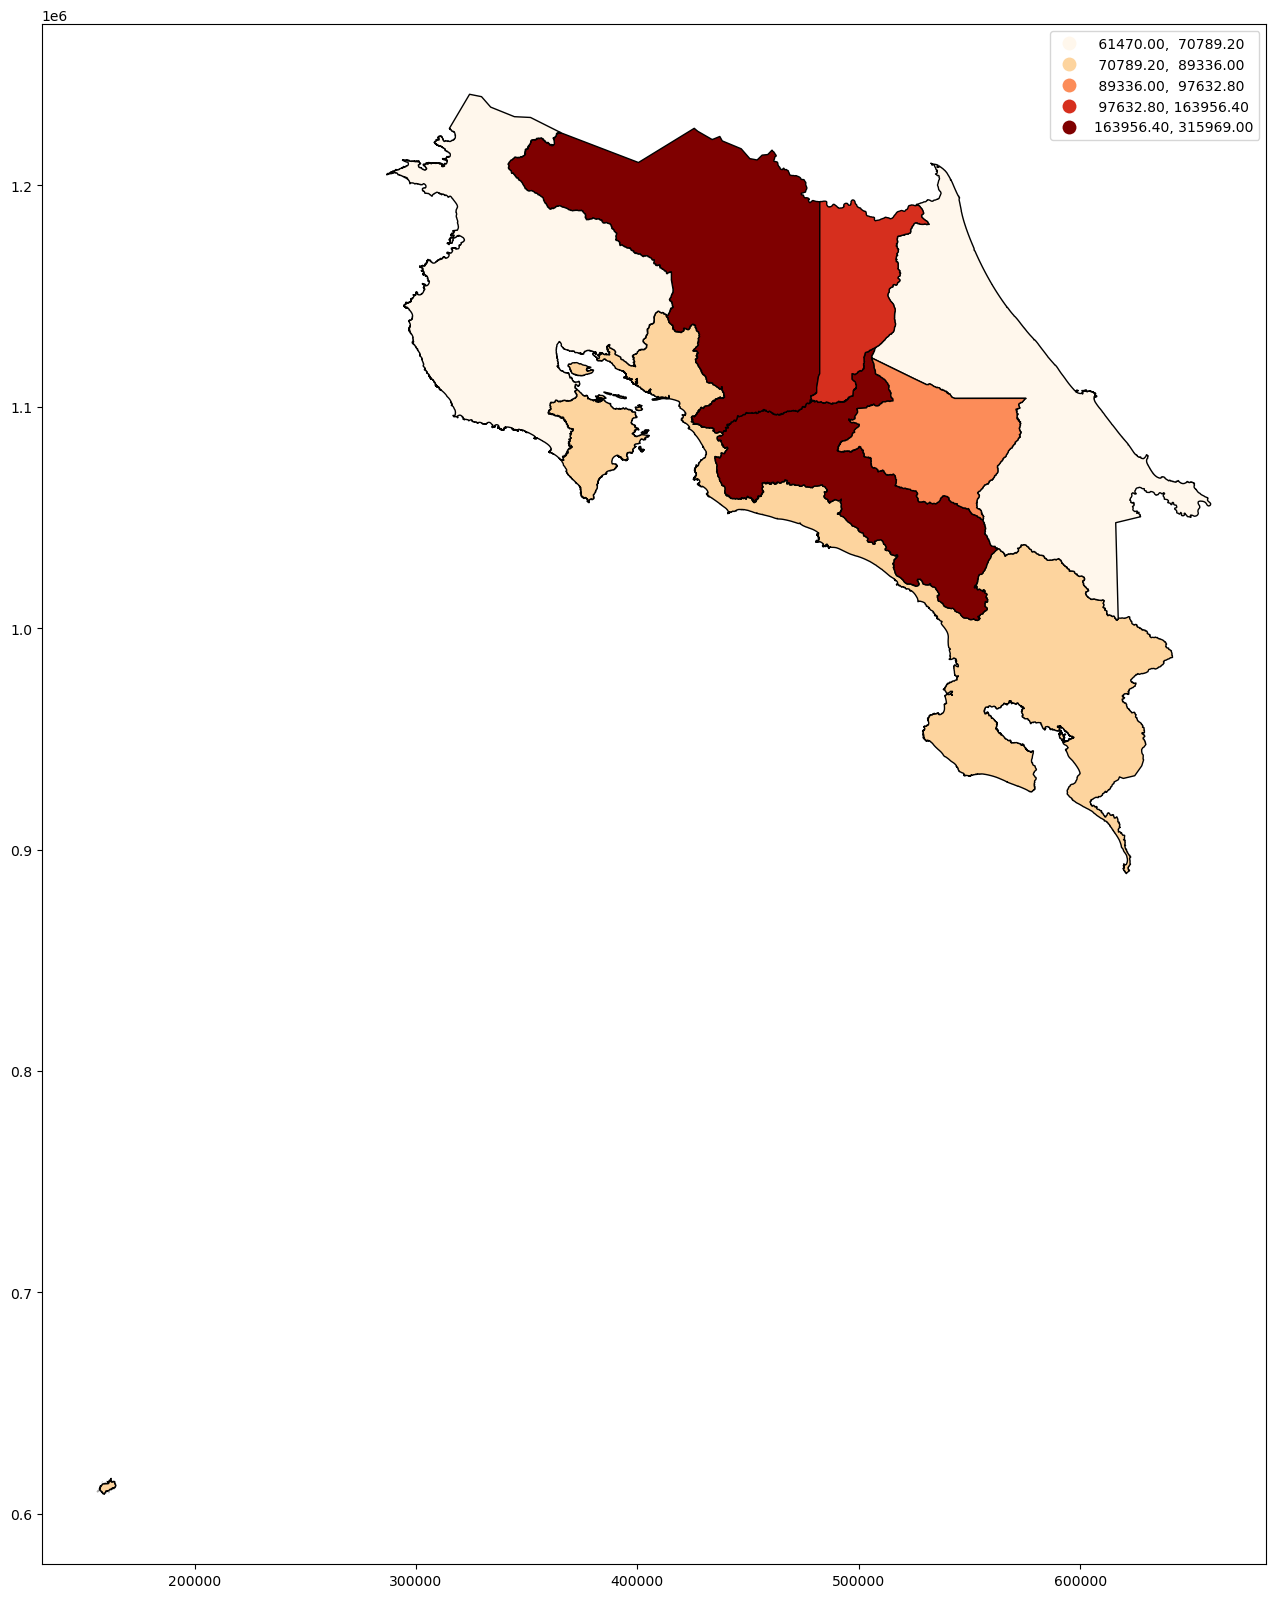

In [96]:
prov_positivos_merged.plot(column = "positivos", 
            legend=True,
            cmap='OrRd', 
            scheme='quantiles',
            edgecolor="black",
            figsize=(20, 20))